In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data

#flow
sample_data = pd.DataFrame(pd.read_csv('20230817_KWTITER-Batch_Analysis_17082023161138.csv',delimiter=',', usecols=['Specimen Name','Well Name','FITC %Parent']))

#dilution plates
dilution_data_p1_raw = pd.read_csv('Spike Dilution Plate Scheme.csv')
dilution_data_p2_raw = pd.read_csv('VSVG Dilution Plate Scheme.csv')

#which dilutions were used for flow
#P1_index_raw = pd.read_csv('Spike (Ace2) Flow Table.csv')
#P2_index_raw = pd.read_csv('VSVG (Ace2) Flow Table.csv')
P3_index_raw = pd.read_csv('VSVG (HEK 293T) Flow Table.csv')


In [3]:
#define sample names
P1_Sample_IDs = dilution_data_p1_raw.columns.tolist()
P2_Sample_IDs = dilution_data_p2_raw.columns.tolist()

In [4]:
#Set axis on dilution plates
dilution_data_p1_raw.columns = ['1','2','3','4','5','6','7','8','9','10','11','12']
dilution_data_p1_raw.index = ['A','B','C','D','E','F','G','H']

dilution_data_p2_raw.columns = ['1','2','3','4','5','6','7','8','9','10','11','12']
dilution_data_p2_raw.index = ['A','B','C','D','E','F','G','H']

In [5]:
#combine well position, dilution, and sample names and convert in to a list-like format

dilution_data_p1 = pd.DataFrame(columns=['Dilution Used','Dilution','Sample','Specimen Name'])

for i in dilution_data_p1_raw.index:    
    for x,v in zip(dilution_data_p1_raw.columns,P1_Sample_IDs):
        temp_list = [i+x,dilution_data_p1_raw.loc[i,x],v,'Plate 1']
        dilution_data_p1.loc[len(dilution_data_p1)] = temp_list


dilution_data_p2 = pd.DataFrame(columns=['Dilution Used','Dilution','Sample','Specimen Name'])

for i in dilution_data_p2_raw.index:    
    for x,v in zip(dilution_data_p2_raw.columns,P2_Sample_IDs):
        temp_list = [i+x,dilution_data_p2_raw.loc[i,x],v,'Plate 3']
        dilution_data_p2.loc[len(dilution_data_p2)] = temp_list

In [6]:
#combine dilution schemes for plate 1 and 2
dilution_data_p1
complete_dilution = pd.concat([dilution_data_p1, dilution_data_p2])

In [7]:
#Set axis on the plates indicating which dilutions were used
#P1_index_raw = P1_index_raw.drop(['Unnamed: 0'],axis=1)
#P1_index_raw.columns = ['1','2','3','4','5','6','7','8','9','10','11','12']
#P1_index_raw.index = ['A','B','C','D','E','F','G','H']

#P2_index_raw = P2_index_raw.drop(['Unnamed: 0'],axis=1)
#P2_index_raw.columns = ['1','2','3','4','5','6','7','8','9','10','11','12']
#P2_index_raw.index = ['A','B','C','D','E','F','G','H']

P3_index_raw = P3_index_raw.drop(['Unnamed: 0'],axis=1)
P3_index_raw.columns = ['1','2','3','4','5','6','7','8','9','10','11','12']
P3_index_raw.index = ['A','B','C','D','E','F','G','H']

In [8]:
#combine well position, dilution, and sample names and convert in to a list-like format

#P1_index = pd.DataFrame(columns=['Well Name','Dilution Used','Specimen Name'])

#for i in P1_index_raw.index:
 #   for x in P1_index_raw.columns:
  #      temp_list = [i+x, P1_index_raw.loc[i,x],'Plate 1']
   #     P1_index.loc[len(P1_index)] = temp_list

#2_index = pd.DataFrame(columns=['Well Name','Dilution Used','Specimen Name'])

#for i in P2_index_raw.index:
 #   for x in P2_index_raw.columns:
  #      temp_list = [i+x, P2_index_raw.loc[i,x],'Plate 2']
   #     P2_index.loc[len(P2_index)] = temp_list
        
P3_index = pd.DataFrame(columns=['Well Name','Dilution Used','Specimen Name'])

for i in P3_index_raw.index:
    for x in P3_index_raw.columns:
        temp_list = [i+x, P3_index_raw.loc[i,x],'Plate 3']
        P3_index.loc[len(P3_index)] = temp_list

In [9]:
#combine tables indicatng which dilutions were used for plates 1, 2, and 3
complete_index = pd.concat([P3_index])

In [10]:
#Combine flow data, dilution, and dilution use schemes
merged_sample_data = pd.merge(sample_data,complete_index, on=['Well Name','Specimen Name'], how = 'left')
merged_sample_data = pd.merge(merged_sample_data,complete_dilution, on=['Dilution Used','Specimen Name'], how = 'left')


In [11]:
#Calculate titers using the Poisson formula. 
#If P is the percentage of cells that are ZsGreen positive, then the titer per ml is: -ln(1 − P/100) × (number of cells/well)/(volume of virus per well in mL)
#volume of virus per well well = (150 µL * dilution) = 0.15 mL * dilution

#cells_counted = 151000
cells_counted = 30375
merged_sample_data['transduction units per mL'] = -np.log(1-(merged_sample_data['FITC %Parent']/100))*(cells_counted/(0.15*merged_sample_data['Dilution']))

In [12]:
#drop samples that had less than 1% or more than 10% FITC stained cells 
filtered_sample_data = merged_sample_data[(merged_sample_data['FITC %Parent'] >= 1) & (merged_sample_data['FITC %Parent'] <= 10)]                                    

In [13]:
filtered_sample_data

,Specimen Name,Well Name,FITC %Parent,Dilution Used,Dilution,Sample,transduction units per mL
0,Plate 1,A1,8.1,NaN,NaN,NaN,NaN
1,Plate 1,A2,6.0,NaN,NaN,NaN,NaN
2,Plate 1,A3,6.6,NaN,NaN,NaN,NaN
3,Plate 1,A4,4.2,NaN,NaN,NaN,NaN
4,Plate 1,A5,9.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185,Plate 3,G8,1.2,C8,0.002222,Both - 2,1.100115e+06
187,Plate 3,H2,1.0,E2,0.000247,DMSO - 2,8.242651e+06
189,Plate 3,H4,1.1,D4,0.000741,C7 - 2,3.023790e+06
190,Plate 3,H5,1.4,D5,0.000741,4µ8c - 1,3.854297e+06


In [14]:
#Add a column to indicate if spike production was induced (true) or vsvg (false)

filtered_sample_data['induction'] = filtered_sample_data['Specimen Name'] == "Plate 1"


/var/folders/sv/w2n5lcb57zz70hk1l6tkkkf00000gp/T/ipykernel_5048/2889561959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sample_data['induction'] = filtered_sample_data['Specimen Name'] == "Plate 1"


In [15]:
filtered_sample_data

,Specimen Name,Well Name,FITC %Parent,Dilution Used,Dilution,Sample,transduction units per mL,induction
0,Plate 1,A1,8.1,NaN,NaN,NaN,NaN,True
1,Plate 1,A2,6.0,NaN,NaN,NaN,NaN,True
2,Plate 1,A3,6.6,NaN,NaN,NaN,NaN,True
3,Plate 1,A4,4.2,NaN,NaN,NaN,NaN,True
4,Plate 1,A5,9.4,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...
185,Plate 3,G8,1.2,C8,0.002222,Both - 2,1.100115e+06,False
187,Plate 3,H2,1.0,E2,0.000247,DMSO - 2,8.242651e+06,False
189,Plate 3,H4,1.1,D4,0.000741,C7 - 2,3.023790e+06,False
190,Plate 3,H5,1.4,D5,0.000741,4µ8c - 1,3.854297e+06,False


In [16]:
#Calculate mean and SEM for each sample
mean = (filtered_sample_data.groupby(['Sample','induction'], as_index=False)['transduction units per mL'].mean()).rename(columns={'transduction units per mL': 'Mean transduction units per mL'})
std = (filtered_sample_data.groupby(['Sample','induction'], as_index=False)['transduction units per mL'].std()).rename(columns={'transduction units per mL': "std"})

merged = mean.merge(std, on = ['Sample', 'induction'])

In [17]:
#sorting list
merged = merged.sort_values(by='induction')
merged

,Sample,induction,Mean transduction units per mL,std
0,4µ8c - 1,False,4.066616e+06,4.156473e+05
1,4µ8c - 2,False,2.750718e+06,1.741713e+06
2,Both - 1,False,2.280253e+06,8.345866e+04
3,Both - 2,False,1.795623e+06,1.025270e+06
4,C7 - 1,False,2.026182e+06,1.330097e+04
5,C7 - 2,False,3.034792e+06,1.412735e+05
6,DMSO - 1,False,4.544929e+06,2.471287e+06
7,DMSO - 2,False,5.543721e+06,2.902307e+06


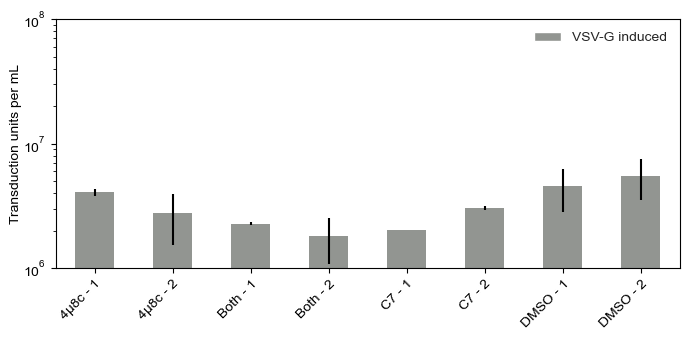

In [18]:
#import some extra plotting functions
from matplotlib.patches import Patch
import matplotlib as mpl
import matplotlib.lines as lines
import matplotlib.colors as mcolors

#define some stuff for plotting
axes_titles = merged.Sample.unique().tolist() #set sample names for plot
x_len = np.arange(len(axes_titles)) #generate an iterable for # of samples
bar_width = 0.2

# Create subplots
#pick some colors
VSV_color = '#929591'
spike_color = '#d8dcd6'

#prepare std for plotting
merged['plot_std'] = merged['std'] * np.log(2)

# Set figure size
fig, ax = plt.subplots(figsize=(7, 3.5))  # Adjust the dimensions as desired

# Plot bar chart
merged.plot(kind='bar', x='Sample', y='Mean transduction units per mL', yerr='plot_std', color=merged['induction'].map({True: spike_color, False: VSV_color}), legend=False, ax=ax)
ax.set_yscale('log')
plt.ylim(1e6, 1e8)
sns.set_style("ticks")

# Set labels and title
plt.xlabel('')
plt.ylabel('Transduction units per mL', labelpad=0.5, fontsize=10)
plt.yticks(fontsize=10)
plt.title('')
plt.xticks(fontsize=10, rotation=45, ha='right', rotation_mode="anchor")

legend_elements = [Patch(facecolor=VSV_color, label='VSV-G induced')]
plt.legend(handles=legend_elements, fontsize=10, loc='upper right', ncol=4, frameon=False)

# Show the plot
plt.tight_layout()
#plt.savefig('titering HEK293T.pdf')

In [19]:
merged

,Sample,induction,Mean transduction units per mL,std,plot_std
0,4µ8c - 1,False,4.066616e+06,4.156473e+05,2.881047e+05
1,4µ8c - 2,False,2.750718e+06,1.741713e+06,1.207263e+06
2,Both - 1,False,2.280253e+06,8.345866e+04,5.784914e+04
3,Both - 2,False,1.795623e+06,1.025270e+06,7.106632e+05
4,C7 - 1,False,2.026182e+06,1.330097e+04,9.219533e+03
5,C7 - 2,False,3.034792e+06,1.412735e+05,9.792330e+04
6,DMSO - 1,False,4.544929e+06,2.471287e+06,1.712965e+06
7,DMSO - 2,False,5.543721e+06,2.902307e+06,2.011726e+06
